# This code is from Handwritten digits Dataset form MNIST dataset

# Importing some useful lib.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as  plt
%matplotlib inline
import numpy as np

* loading dataset

In [2]:
 (x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

* Data Exploration

In [3]:
len(x_train),len(x_test)

(60000, 10000)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

* visualising

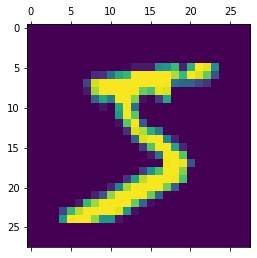

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

* scaling

In [8]:
x_train = x_train/255
x_test = x_test/255

* flattening the 2D array as 1D to pass as input

In [9]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [10]:
x_train_flattened.shape,x_test_flattened.shape

((60000, 784), (10000, 784))

# Building neural network model

* This neural network is of two layer input and output layers

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics = ["accuracy"]
            )
model.fit(x_train_flattened,y_train,epochs=10)
             

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4690 - accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9280
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2533 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.251

* Evaluating preformance on test dataset

In [12]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2642 - accuracy: 0.9259


[0.26416829228401184, 0.9258999824523926]

# Prediction

In [13]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([4.0147603e-03, 1.4129746e-08, 1.2431920e-02, 9.7650766e-01,
       1.7286539e-03, 1.1961630e-01, 4.9367916e-08, 9.9991226e-01,
       8.1425816e-02, 7.0532793e-01], dtype=float32)

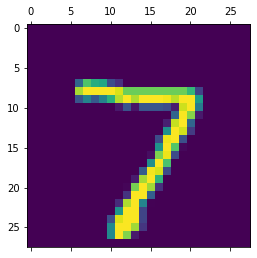

In [14]:
plt.matshow(x_test[0])

In [15]:
np.argmax(y_predicted[0])

7

In [16]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    2,    2,    1,    7,    9,    5,    2,    0],
       [   0, 1107,    4,    2,    0,    1,    4,    2,   15,    0],
       [   6,    8,  917,   21,    8,    3,   13,   12,   41,    3],
       [   2,    0,   12,  934,    0,   17,    3,   11,   22,    9],
       [   1,    1,    4,    2,  912,    0,   10,    5,    9,   38],
       [   8,    2,    1,   42,    9,  760,   17,    9,   37,    7],
       [  10,    3,    5,    1,    7,   10,  917,    2,    3,    0],
       [   1,    6,   20,    5,    4,    0,    0,  958,    3,   31],
       [   5,    6,    6,   22,    9,   18,   10,   12,  880,    6],
       [   9,    7,    1,    9,   25,    4,    0,   24,    8,  922]])>

Text(0.5, 15.0, 'Predicted')

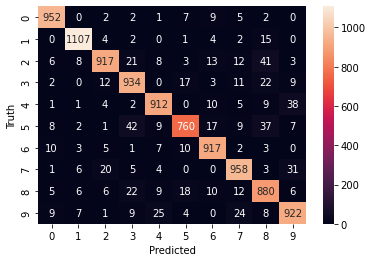

In [18]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel("Truth")
plt.xlabel("Predicted")

# Building neural network with two hidden layer

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100 ,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)

In [20]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3436 - accuracy: 0.9002
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1362 - accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0971 - accuracy: 0.9707: 0s - loss:
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0606 - accuracy: 0.9811


* Evaluating the preformace on test dataset

In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0958 - accuracy: 0.9725


[0.0958181843161583, 0.9725000262260437]

# Prediction on one hidden layer

In [22]:
y_predict_hidden = model.predict(x_test_flattened)
y_predict_hidden = [np.argmax(i) for i in y_predict_hidden]

In [23]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_hidden)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    1,    7,    1,    3,    0],
       [   0, 1120,    3,    3,    0,    1,    3,    1,    4,    0],
       [   9,    2,  997,    7,    5,    0,    2,    4,    6,    0],
       [   0,    0,    5,  987,    0,    6,    0,    3,    8,    1],
       [   0,    0,    5,    0,  956,    0,    9,    4,    2,    6],
       [   2,    1,    0,   10,    2,  860,    6,    0,   10,    1],
       [   2,    3,    0,    1,    2,    4,  943,    0,    3,    0],
       [   1,    7,   20,    0,    2,    0,    0,  989,    5,    4],
       [   1,    0,    3,    5,    4,    7,    3,    3,  946,    2],
       [   2,    3,    0,   13,   12,    4,    2,    6,    8,  959]])>

Text(0.5, 15.0, 'Predicted')

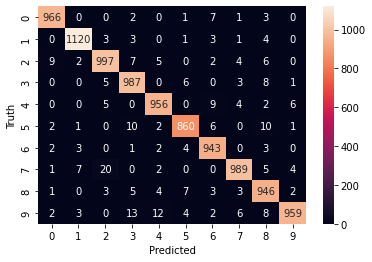

In [24]:
import seaborn as sns
sns.heatmap(cm1,annot=True,fmt="d")
plt.ylabel("Truth")
plt.xlabel("Predicted")

* In the above code we have done flattening of array 
* By the way tensorflow come with ready made lib. which will automatically flatten the layer

In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 ,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics= ['accuracy', 'mse']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.9013 - mse: 24.1528
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1341 - accuracy: 0.9603 - mse: 24.6562
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0974 - accuracy: 0.9712 - mse: 24.861 - 6s 3ms/step - loss: 0.0972 - accuracy: 0.9713 - mse: 24.8626
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9776 - mse: 25.0180
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0610 - accuracy: 0.9818 - mse: 25.1719


In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.9725 - mse: 25.1718


[0.0906626507639885, 0.9725000262260437, 25.17176055908203]